In [2]:
from fetch_dataframe_from_server import fetch_dataframe_from_server
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from cycler import cycler


c:\Users\I3lac\Desktop\BachelorThesisAnalysis\evalaution_environment\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']


C:\Users\I3lac\AppData\Local\Temp\ipykernel_16196\2400080220.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows.append(list(df[df["scenario_name"] == scenario_name][df["metric"] == metric][df["borda_score"] == borda_score]['result'])[0])


[0.8793670806766782, 0.878907262860055, 0.8797218957954762, 0.8781311146513904]
[0.8526598065067423, 0.8514233003599136, 0.8520581606494175, 0.8552537644993444]
[0.906313362409589, 0.906313362409589, 0.906313362409589, 0.906313362409589]
[0.9593037538417434, 0.9618761363274315, 0.961216743337246, 0.9579836861643706]
[0.9120354174292027, 0.9142767410004897, 0.9150281121703194, 0.9114431932921816]
[0.7680543068021429, 0.7576090989792431, 0.7504260634322314, 0.7706990063024455]
[0.9231234260082504, 0.927225568315366, 0.9269555347589922, 0.9311014921659698]
['ASP-POTASSCO' 'CPMP-2015' 'CSP-2010' 'MAXSAT15-PMS-INDU' 'QBF-2016'
 'SAT12-HAND' 'SAT12-INDU']
[0.1412315275595441, 0.1412783743208475, 0.14037205135088815, 0.13790281631047874]
[0.19713352685050797, 0.20094339622641505, 0.1990566037735849, 0.1933599419448476]
[0.022297979724826632, 0.022297979724826632, 0.022297979724826632, 0.022297979724826632]
[0.07384894879831125, 0.06428913296914557, 0.0695522908638824, 0.07754261812770497]
[0.

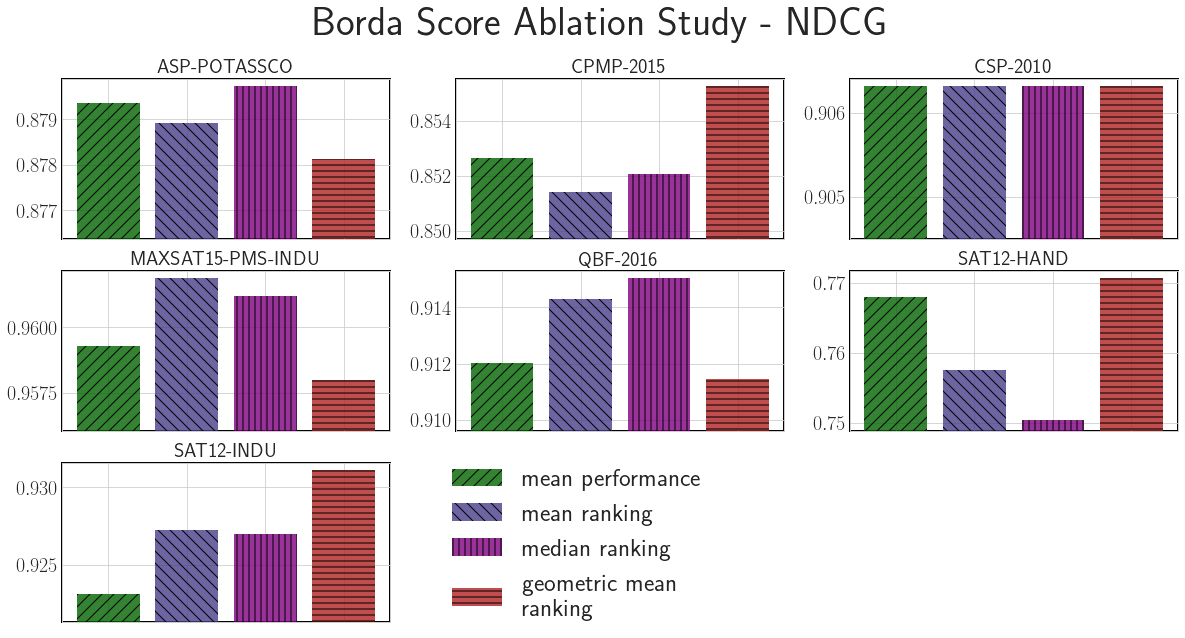

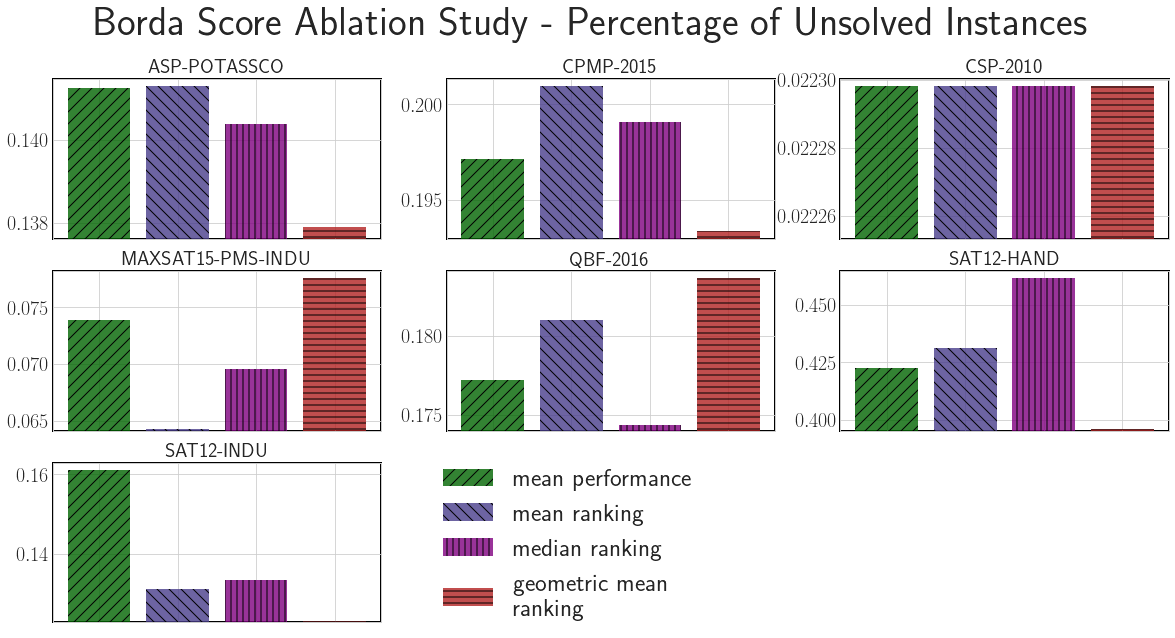

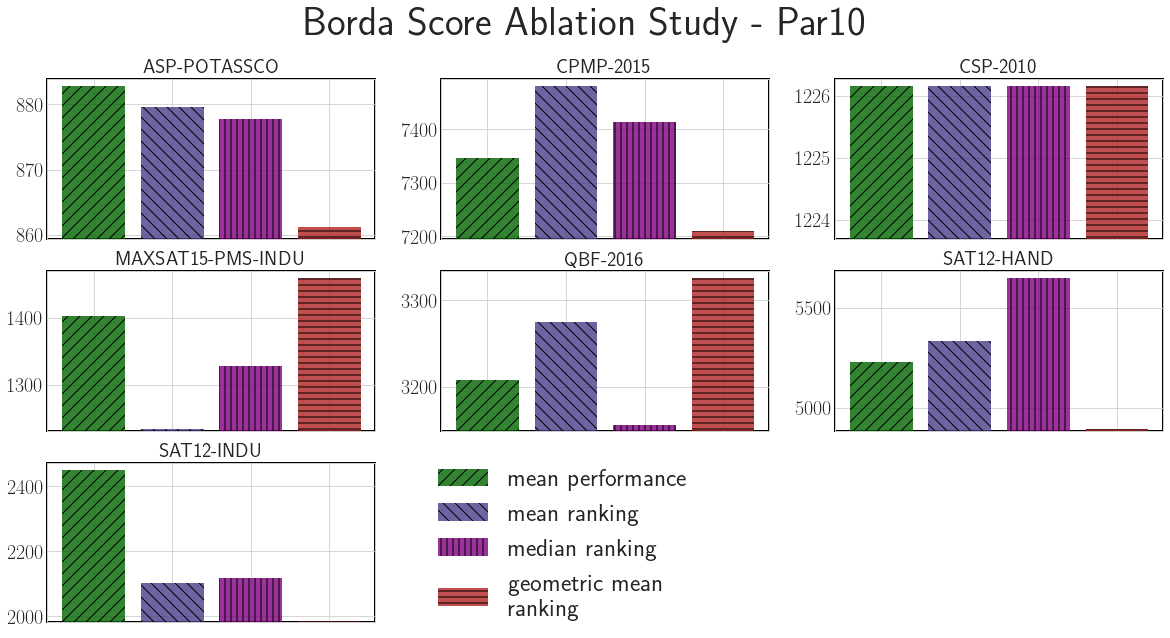

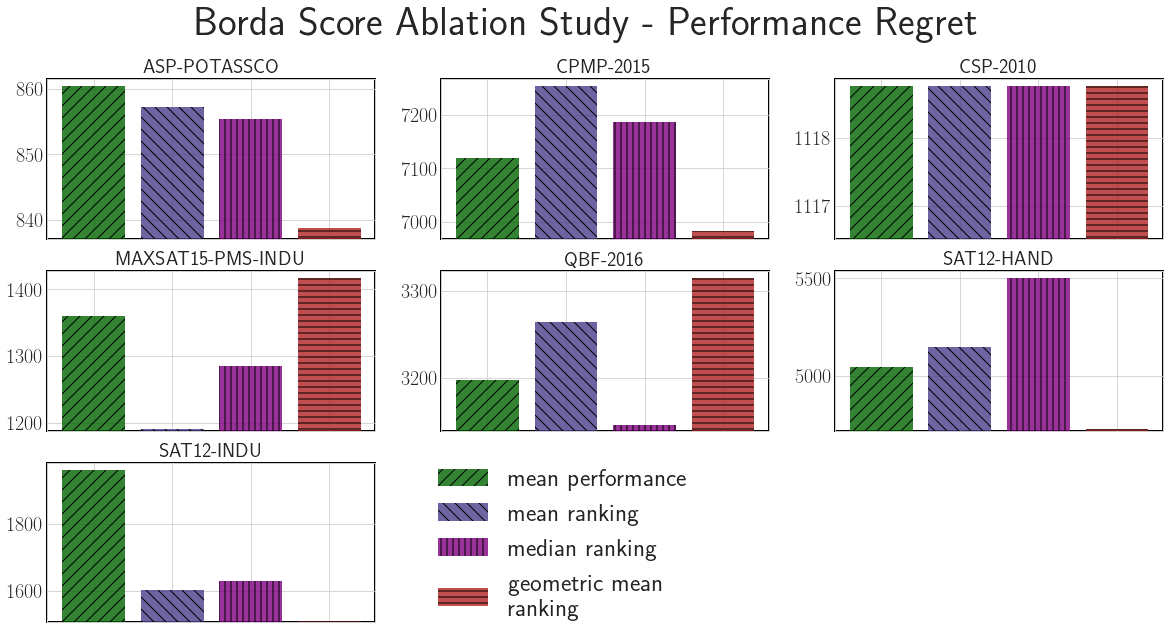

In [3]:
sql_statement = """ SELECT scenario_name, approach, metric, borda_score, AVG(result) as result FROM `ablation_study_borda_score`  
    GROUP BY scenario_name, approach, metric, borda_score  
    ORDER BY `ablation_study_borda_score`.`scenario_name`, `ablation_study_borda_score`.`metric`,  `ablation_study_borda_score`.`borda_score` ASC"""
rcParams['font.family'] = 'sans-serif'
 
df = fetch_dataframe_from_server(sql_statement)
df = df[df["approach"] == "BinaryDecisionTree"]

for metric in df["metric"].unique():
    fig, axs = plt.subplots(len(df["scenario_name"].unique())//3 + 1, len(df["scenario_name"].unique())//2,)
    fig.set_size_inches(20, 10, forward=True)
    axs = axs.flatten()
    print(df["scenario_name"].unique())
    if metric == 'par10':
        metric_name_graph = 'Par10'
    if metric == 'performanceRegret':
        metric_name_graph = 'Performance Regret'
    if metric == 'number_unsolved_instances_False':
        metric_name_graph = 'Percentage of Unsolved Instances'
    if metric == 'NDCG':
        metric_name_graph = 'NDCG'
    
    for scenario_number, scenario_name in enumerate(df["scenario_name"].unique()):
        rows = list()
        
        
        
        fig.suptitle("Borda Score Ablation Study - " + metric_name_graph , fontsize=40)
        
        
        axs[scenario_number].patch.set_edgecolor("black")
        axs[scenario_number].patch.set_linewidth("2")
        axs[scenario_number].patch.set_edgecolor("black")
        axs[scenario_number].patch.set_linewidth("2")
        
        
        for number, borda_score in enumerate(df["borda_score"].unique(),):
            rows.append(list(df[df["scenario_name"] == scenario_name][df["metric"] == metric][df["borda_score"] == borda_score]['result'])[0])
        print(rows)
        rows = np.array(rows)
        bottom = np.min(rows) - 1/500* np.min(rows)
        rows = rows - bottom
        rects = axs[scenario_number].bar(range(len(rows)), rows, bottom=bottom, color = ['darkgreen', 'darkslateblue', 'purple', 'firebrick'], alpha = 0.8,)
        axs[scenario_number].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False,
            labelsize=20,)
        axs[scenario_number].set_title(scenario_name, fontsize=20)
        patterns = ['//', '\\\\', '||', '--']
        for pattern, bar in zip(patterns, axs[scenario_number].patches):
            bar.set_hatch(pattern)
        axs[scenario_number].tick_params(axis='y', which='major', labelsize=20)
    
        
    fig.delaxes(axs[-1])
    fig.delaxes(axs[-2])
    fig.legend(rects,['mean performance', 'mean ranking', 'median ranking', 'geometric mean \n ranking'], bbox_to_anchor=(0.0853, -0.13, 0.5, 0.5), prop = {'size': 25})
    plt.savefig("borda score ablation study - " + metric_name_graph + ".png",bbox_inches='tight')
        